# Exploratory Data Analysis for WESAD

## Imports

In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib
import matplotlib.pyplot as plt

## Load Files

In [2]:
f = open('/home/deepin/Desktop/projects/hrv/WESAD/WESAD/S3/S3.pkl', 'rb')
temp = pickle._Unpickler(f)
temp.encoding = 'latin1'
pkl_dict = temp.load()
f.close()

In [3]:
pkl_dict

{'signal': {'chest': {'ACC': array([[ 7.20000029e-01, -1.38199985e-01,  3.19339991e+00],
          [ 5.68799973e-01, -2.28600025e-01,  3.18219995e+00],
          [ 3.99799943e-01, -3.13199997e-01,  2.94499993e+00],
          ...,
          [ 9.01800036e-01,  5.85999489e-02, -7.79998302e-03],
          [ 9.07400012e-01,  7.62000084e-02,  2.59995461e-03],
          [ 9.68199968e-01,  1.83400035e-01,  1.79999948e-01]]),
   'ECG': array([[-0.75663757],
          [-0.70820618],
          [-0.67396545],
          ...,
          [-0.24847412],
          [-0.18598938],
          [-0.14176941]]),
   'EMG': array([[ 0.00595093],
          [-0.0385437 ],
          [-0.04943848],
          ...,
          [-0.11604309],
          [-0.11082458],
          [-0.06486511]]),
   'EDA': array([[7.98835754],
          [7.98225403],
          [7.98339844],
          ...,
          [7.53211975],
          [7.53059387],
          [7.5340271 ]]),
   'Temp': array([[31.499023],
          [31.501953],
         

In [4]:
eda_df = pd.read_csv('/home/deepin/Desktop/projects/hrv/WESAD/WESAD/S3chest.csv', index_col=0)

## ECG

Text(0.5, 1.0, 'ECG Data')

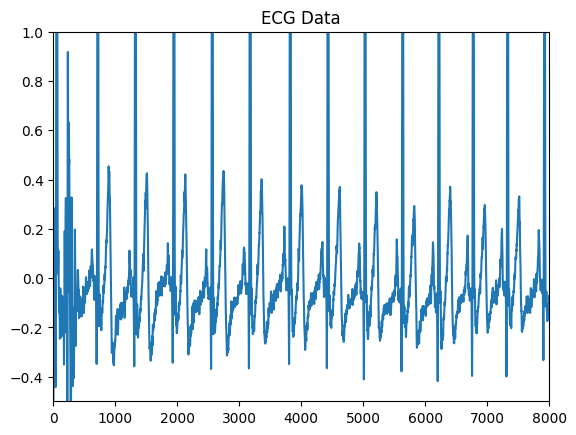

In [5]:
time_series = pkl_dict['signal']['chest']['ECG']
plt.plot(time_series)
plt.xlim(0, 8000)
plt.ylim(-0.5, 1)
plt.title("ECG Data")

## EMG

Text(0.5, 1.0, 'EMG Data')

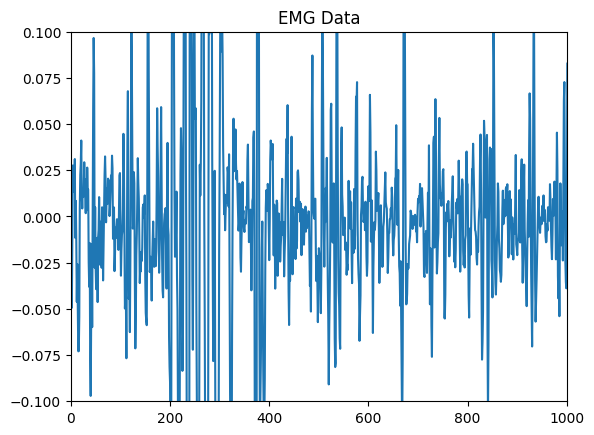

In [6]:
time_series = pkl_dict['signal']['chest']['EMG']
plt.plot(time_series)
plt.xlim(0, 1000)
plt.ylim(-0.1, 0.1)
plt.title("EMG Data")

In [7]:
eda_df['chestACCx']

ID
3    0.7200
3    0.5688
3    0.3998
3    0.2454
3    0.0938
      ...  
3    0.9150
3    0.9086
3    0.9018
3    0.9074
3    0.9682
Name: chestACCx, Length: 4545100, dtype: float64

In [8]:
eda_df['chestACCy'].max()

1.3224000930786133

In [9]:
eda_df['chestACCz'].max()

4.508200168609619

## Accelerometer

Text(0.5, 1.0, 'Accelerometer Data')

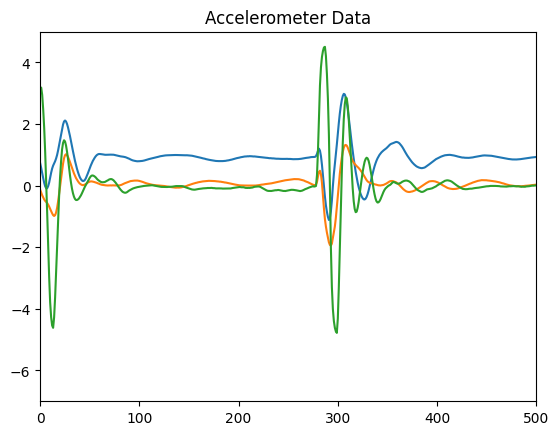

In [10]:
# plt.plot(eda_df['chestACCx'])
# plt.plot(eda_df['chestACCy'])
# plt.plot(eda_df['chestACCz'])
time_series = pkl_dict['signal']['chest']['ACC']
plt.plot(time_series)
plt.xlim(0, 500)
plt.ylim(-7.0, 5.0)
plt.title("Accelerometer Data")

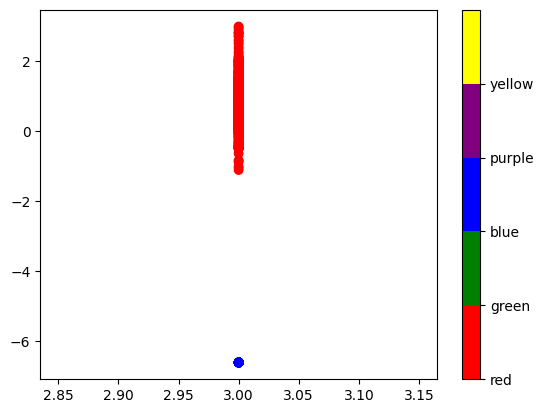

In [11]:
eda_df = eda_df[eda_df['label'] <= 4]
colors = ['red', 'green', 'blue', 'purple', 'yellow']
plt.scatter(eda_df.index, eda_df['chestACCx'], c=eda_df['label'], cmap=matplotlib.colors.ListedColormap(colors))
cb = plt.colorbar()
loc = np.arange(0, max(eda_df['label']), max(eda_df['label']) / float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(colors)

## EDA

Text(0.5, 1.0, 'EDA Data')

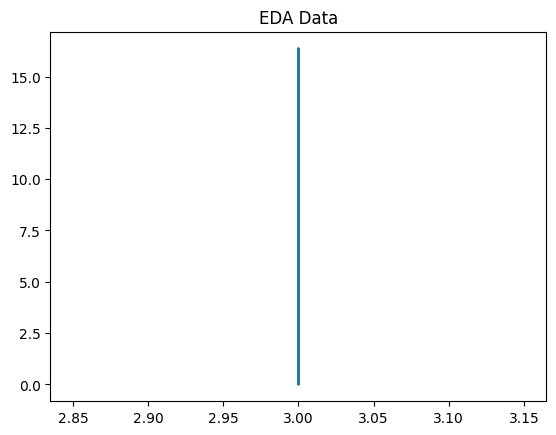

In [12]:
plt.plot(eda_df['chestEDA'])
plt.title("EDA Data")

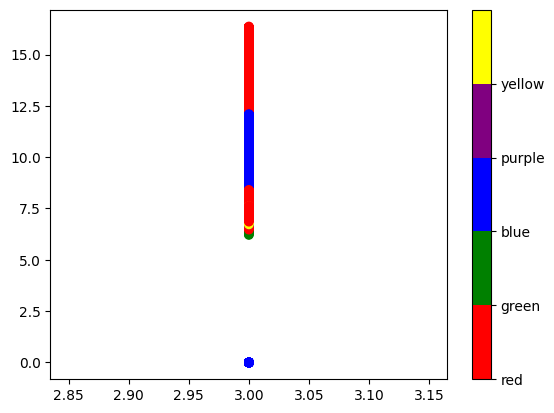

In [13]:
colors = ['red', 'green', 'blue', 'purple', 'yellow']
plt.scatter(eda_df.index, eda_df['chestEDA'], c=eda_df['label'], cmap=matplotlib.colors.ListedColormap(colors))
cb = plt.colorbar()
loc = np.arange(0, max(eda_df['label']), max(eda_df['label']) / float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(colors)